In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [26]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

* class distribution
* missing values

In [69]:
TARGET_VAR = 'failure'

# Load data

In [2]:
filename_ls = os.listdir('data')
filename_ls

['model_2015_ST4000DM000.csv',
 'model_2016_ST4000DM000.csv',
 'model_2017_ST4000DM000.csv',
 'model_2018_ST4000DM000.csv']

In [3]:
raw_df_ls = [pd.read_csv(f'data/{filename}', delimiter=',') for filename in filename_ls]

In [4]:
[df.shape for df in raw_df_ls]

[(1243993, 95), (1076071, 95), (178298, 95), (380078, 105)]

In [12]:
# extra columns in 2018 data
extra_cols= set(raw_df_ls[3].columns) - set(raw_df_ls[2].columns)
extra_cols

{'smart_177_normalized',
 'smart_177_raw',
 'smart_179_normalized',
 'smart_179_raw',
 'smart_181_normalized',
 'smart_181_raw',
 'smart_182_normalized',
 'smart_182_raw',
 'smart_235_normalized',
 'smart_235_raw'}

In [ ]:
# Drop columns only in 2018
raw_df_ls[3].drop(list(extra_cols), axis=1, inplace=True)

In [19]:
[df.shape for df in raw_df_ls]

[(1243993, 95), (1076071, 95), (178298, 95), (380078, 95)]

In [20]:
[df.date.agg(['min', 'max']) for df in raw_df_ls]


[min    2015-01-01
 max    2015-12-31
 Name: date, dtype: object, min    2016-01-01
 max    2016-09-30
 Name: date, dtype: object, min    2017-10-01
 max    2017-12-31
 Name: date, dtype: object, min    2018-01-01
 max    2018-12-31
 Name: date, dtype: object]

In [21]:
df_raw = pd.concat(raw_df_ls, sort=True)
df_raw.shape

(2878440, 95)

In [23]:
# Save
df_raw.to_pickle('data/raw_combined.pickle')

# Target distribution

In [32]:
df_raw.failure.value_counts('pct')

0    0.955247
1    0.044753
Name: failure, dtype: float64

In [24]:
df_raw.failure.value_counts()

0    2749620
1     128820
Name: failure, dtype: int64

# Data quality

In [44]:
df_raw.describe(include='all')

,capacity_bytes,date,failure,model,serial_number,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_191_normalized,smart_191_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_195_normalized,smart_195_raw,smart_196_normalized,smart_196_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_1_normalized,smart_1_raw,smart_200_normalized,smart_200_raw,smart_201_normalized,smart_201_raw,smart_220_normalized,smart_220_raw,smart_222_normalized,smart_222_raw,smart_223_normalized,smart_223_raw,smart_224_normalized,smart_224_raw,smart_225_normalized,smart_225_raw,smart_226_normalized,smart_226_raw,smart_22_normalized,smart_22_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw
count,2878440.00,2878440,2878440.00,2878440,2878440,2878408.00,2878408.00,0.00,0.00,2878408.00,2878408.00,0.00,0.00,0.00,0.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,0.00,0.00,0.00,0.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,0.00,0.00,2878408.00,2878408.00
unique,NaN,912,NaN,1,23764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-09-02,NaN,ST4000DM000,W300CEVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6567,NaN,2878440,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4000743942649.95,NaN,0.04,NaN,NaN,100.00,0.00,NaN,NaN,100.00,9.49,NaN,NaN,NaN,NaN,99.57,1.91,99.99,0.01,99.90,0.11,100.00,3877745536.42,97.39,4.59,74.75,25.25,100.00,0.00,100.00,2.30,87.90,26359.72,25.25,25.25,NaN,NaN,NaN,NaN,100.00,0.44,100.00,0.44,200.00,2.73,115.28,121578237.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,24603759573461.31,100.00,22941876962.36,100.00,93352338329.29,NaN,NaN,NaN,NaN,NaN,N

In [42]:
missing_values = df_raw.isna().sum()
cols_all_missing = list(missing_values.loc[missing_values==len(df_raw)].index)

num_unique_values = df_raw.nunique()
cols_single_value = list(num_unique_values.loc[num_unique_values==1].index)


In [65]:
# remove columns with all missing rows or constant value
drop_cols = list(set(cols_all_missing +  cols_single_value))
df_main = df_raw.copy().drop(drop_cols, axis=1)

In [76]:
# remove columns not useful as features
non_feature_cols = ['date', 'capacity_bytes', 'serial_number']
df_input = df_main.copy().drop(non_feature_cols, axis=1)

In [77]:
df_input.describe(include='all')

,failure,smart_12_normalized,smart_12_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_raw,smart_1_normalized,smart_1_raw,smart_240_raw,smart_241_raw,smart_242_raw,smart_3_normalized,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw
count,2878440.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00,2878408.00
mean,0.04,100.00,9.49,99.57,1.91,99.99,0.01,99.90,0.11,100.00,3877745536.42,97.39,4.59,74.75,25.25,2.30,87.90,26359.72,25.25,25.25,100.00,0.44,100.00,0.44,2.73,115.28,121578237.33,24603759573461.31,22941876962.36,93352338329.29,94.41,100.00,8.55,99.99,6.48,83.42,28700585526.51,85.79,12882.38
std,0.21,0.15,150.57,4.50,101.18,0.47,0.47,1.54,3.86,0.00,586648275986.28,6.24,261.72,4.87,4.87,14.65,16.82,42778.01,4.87,4.87,0.16,26.68,0.16,26.68,94.93,3.87,70443265.21,63269526951072.41,10033012552.96,87410609080.98,2.84,0.01,16.18,0.22,286.70,4.72,2530416325941.21,10.86,9514.32
min,0.00,84.00,0.00,1.00,0.00,28.00,0.00,1.00,0.00,98.00,0.00,1.00,0.00,49.00,13.00,0.00,1.00,2.00,13.00,13.00,5.00,0.00,5.00,0.00,0.00,86.00,0.00,4.00,0.00,1641.00,91.00,99.00,1.00,51.00,0.00,28.00,10.00,46.00,5.00
25%,0.00,100.00,3.00,100.00,0.00,100.00,0.00,100.00,0.00,100.00,0.00,97.00,0.00,72.00,22.00,0.00,84.00,5215.00,22.00,22.00,100.00,0.00,100.00,0.00,0.00,114.00,60127720.00,4517.00,16414625598.50,7113427618.75,92.00,100.00,3.00,100.00,0.00,81.00,143844559.00,79.00,4570.00
50%,0.00,100.00,6.00,100.00,0.00,100.00,0.00,100.00,0.00,100.00,0.00,100.00,0.00,76.00,24.00,0.00,94.00,12868.00,24.00,24.00,100.00,0.00,100.00,0.00,0.00,117.00,121186524.00,13518.00,21998494709.00,80074281195.00,94.00,100.00,6.00,100.00,0.00,84.00,286640707.50,88.00,11307.00
75%,0.00,100.00,11.00,100.00,0.00,100.00,0.00,100.00,0.00,100.00,0.00,100.00,3.00,78.00,28.00,2.00,98.00,33947.00,28.00,28.00,100.00,0.00,100.00,0.00,0.00,118.00,182631848.00,27407.00,27497138985.50,148028768874.50,97.00,100.00,11.00,100.00,0.00,87.00,578029560.50,95.00,19006.00
max,1.00,100.00,16416.00,100.00,21060.00,100.00,72.00,100.00,5880.00,100.00,90483456692811.00,100.00,65535.00,215.00,141.00,1492.00,100.00,1035950.00,141.00,141.00,100.00,15664.00,100.00,15664.00,5516.00,120.00,244140312.00,281470681757991.00,59461441136.00,750938919069.00,100.00,100.00,1507.00,100.00,64720.00,100.00,281471681281690.00,100.00,47333.00


# EDA

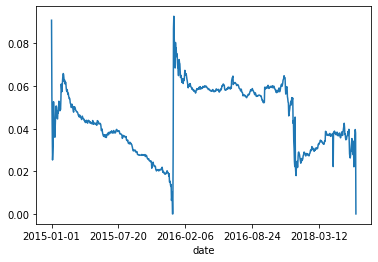

In [74]:
# failure rate over time
df_main.groupby('date').failure.mean().plot()

In [82]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    # plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [83]:
plotCorrelationMatrix(df_input, 12)

c:\Users\user\AppData\Local\conda\conda\envs\p37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2
